In [ ]:
!pip install cryptography==38.0.4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
warnings.filterwarnings('ignore')
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from textblob.np_extractors import ConllExtractor
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer
warnings.filterwarnings("ignore", category=DeprecationWarning)
nltk.download('stopwords')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 26.4 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving resumes (1).csv to resumes (1).csv


In [ ]:
data = pd.read_csv('resumes (1).csv')

In [ ]:
data

,Unnamed: 0,Resumes,Catagory
0,0,Name: Ravali P ...,Reactjs
1,1,SUSOVAN BAG Seeking a challenging posit...,Reactjs
2,2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs
3,3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs
4,4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs
...,...,...,...
76,76,Workday HCM Techno functional Consultant ...,workday
77,77,Ramesh A (Workday HCM Con...,workday
78,78,Srikanth (WORKDAY hCM Consultant) ...,workday
79,79,WORKDAY | HCM | FCM Name : Kumar S.S Role ...,workday


In [ ]:
data=data.reset_index()

In [ ]:
data

,index,Unnamed: 0,Resumes,Catagory
0,0,0,Name: Ravali P ...,Reactjs
1,1,1,SUSOVAN BAG Seeking a challenging posit...,Reactjs
2,2,2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs
3,3,3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs
4,4,4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs
...,...,...,...,...
76,76,76,Workday HCM Techno functional Consultant ...,workday
77,77,77,Ramesh A (Workday HCM Con...,workday
78,78,78,Srikanth (WORKDAY hCM Consultant) ...,workday
79,79,79,WORKDAY | HCM | FCM Name : Kumar S.S Role ...,workday


In [ ]:
data_1=data.iloc[:,2:4]

In [ ]:
data_1

,Resumes,Catagory
0,Name: Ravali P ...,Reactjs
1,SUSOVAN BAG Seeking a challenging posit...,Reactjs
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs
3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs
...,...,...
76,Workday HCM Techno functional Consultant ...,workday
77,Ramesh A (Workday HCM Con...,workday
78,Srikanth (WORKDAY hCM Consultant) ...,workday
79,WORKDAY | HCM | FCM Name : Kumar S.S Role ...,workday


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   81 non-null     object
 1   Catagory  81 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [ ]:
data_1.isnull().sum()


Resumes     0
Catagory    0
dtype: int64

Checking unnecessary words in the Data

In [ ]:
data_1.Resumes.str.contains('https://').value_counts() / len(data)

False    0.925926
True     0.074074
Name: Resumes, dtype: float64

In [ ]:
data_1.Resumes.str.contains('@').value_counts() / len(data)

False    0.962963
True     0.037037
Name: Resumes, dtype: float64

In [ ]:
print('Total Resumes this period:', len(data_1.index), '\n')

Total Resumes this period: 81 



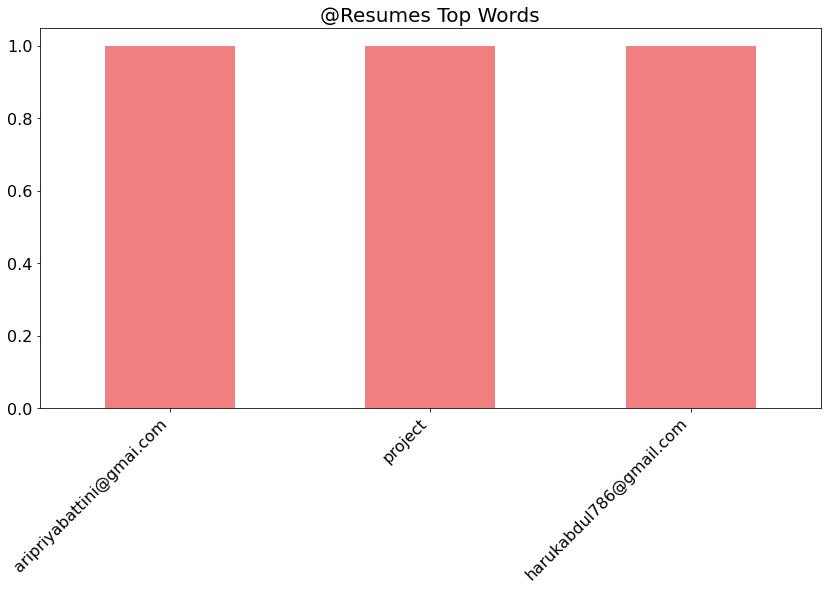

In [ ]:
import itertools

c = list(
itertools.chain(
    *data.Resumes.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") 
                            if '@' in handle.replace(":", "")]).tolist())
)

pd.Series(c).value_counts().head(20).plot.bar(
    figsize=(14, 7), fontsize=16, color='lightcoral'
)
plt.gca().set_title('@Resumes Top Words', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=16)
pass

Tokenization

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
tokens = data_1.Resumes.map(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data=[Text.strip() for Text in data.Resumes] # remove both the leading and the trailing characters
data=[Text for Text in data if Text] # removes empty strings(considered in Python as False)
data[0:10]

['Name: Ravali P                                                                               Curriculum Vitae                                            Specialization: BE (computer science and Engg)            C A R EE R   OB JE CT I V E           C A R EE R   OB JE CT I V E     To utilize my technical skills for achieving the target and developing the best performance in organization.               E D U C A T ION            E D U C A T ION       Degree/Course    College/Institute  University/ Board  Percentage/ CGPA    Year of Passing             CGPACGPA                                    BE     S J B Institute of technology      VTU    6.5 CGPA      2021                      Diploma  Aryabharathi polytechnic   Karnataka State Board of Technical Examination,  Bengaluru    60%                   2017                          SSLC  Empress girls high school     Karnataka  Secondary  Education  Board    52.8%                   2011        MANUAL TESTING SKILLS       Strong knowledge 

In [ ]:
review_text=' '.join(data)
review_text[:1000]

'Name: Ravali P                                                                               Curriculum Vitae                                            Specialization: BE (computer science and Engg)            C A R EE R   OB JE CT I V E           C A R EE R   OB JE CT I V E     To utilize my technical skills for achieving the target and developing the best performance in organization.               E D U C A T ION            E D U C A T ION       Degree/Course    College/Institute  University/ Board  Percentage/ CGPA    Year of Passing             CGPACGPA                                    BE     S J B Institute of technology      VTU    6.5 CGPA      2021                      Diploma  Aryabharathi polytechnic   Karnataka State Board of Technical Examination,  Bengaluru    60%                   2017                          SSLC  Empress girls high school     Karnataka  Secondary  Education  Board    52.8%                   2011        MANUAL TESTING SKILLS       Strong knowledge i

In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
review_tokens=tknzr.tokenize(review_text)
print(review_tokens[:100])

['Name', ':', 'Ravali', 'P', 'Curriculum', 'Vitae', 'Specialization', ':', 'BE', '(', 'computer', 'science', 'and', 'Engg', ')', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'To', 'utilize', 'my', 'technical', 'skills', 'for', 'achieving', 'the', 'target', 'and', 'developing', 'the', 'best', 'performance', 'in', 'organization', '.', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'Degree', '/', 'Course', 'College', '/', 'Institute', 'University', '/', 'Board', 'Percentage', '/', 'CGPA', 'Year', 'of', 'Passing', 'CGPACGPA', 'BE', 'S', 'J', 'B', 'Institute', 'of', 'technology', 'VTU', '6.5', 'CGPA', '2021', 'Diploma', 'Aryabharathi', 'polytechnic', 'Karnataka', 'State']


In [ ]:
review_tokens_text=' '.join(review_tokens)
review_tokens_text[:1000]

'Name : Ravali P Curriculum Vitae Specialization : BE ( computer science and Engg ) C A R EE R OB JE CT I V E C A R EE R OB JE CT I V E To utilize my technical skills for achieving the target and developing the best performance in organization . E D U C A T ION E D U C A T ION Degree / Course College / Institute University / Board Percentage / CGPA Year of Passing CGPACGPA BE S J B Institute of technology VTU 6.5 CGPA 2021 Diploma Aryabharathi polytechnic Karnataka State Board of Technical Examination , Bengaluru 60 % 2017 SSLC Empress girls high school Karnataka Secondary Education Board 52.8 % 2011 MANUAL TESTING SKILLS Strong knowledge in SDLC concepts . Extensive knowledge in White Box Testing . Good knowledge in Functional testing , Integration testing , Extreme Knowledge on System Testing Good knowledge in Adhoc Testing , Reliability testing . Good Knowledge on Exploratory Testing Good knowledge in STLC concepts . Good knowledge in Test cases and Test scenarios . Good knowledge i

Removing Punctuations, URL from data#

In [ ]:
import string

In [ ]:
no_punc_text=review_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'Name  Ravali P Curriculum Vitae Specialization  BE  computer science and Engg  C A R EE R OB JE CT I V E C A R EE R OB JE CT I V E To utilize my technical skills for achieving the target and developing the best performance in organization  E D U C A T ION E D U C A T ION Degree  Course College  Institute University  Board Percentage  CGPA Year of Passing CGPACGPA BE S J B Institute of technology VTU 65 CGPA 2021 Diploma Aryabharathi polytechnic Karnataka State Board of Technical Examination  Bengaluru 60  2017 SSLC Empress girls high school Karnataka Secondary Education Board 528  2011 MANUAL TESTING SKILLS Strong knowledge in SDLC concepts  Extensive knowledge in White Box Testing  Good knowledge in Functional testing  Integration testing  Extreme Knowledge on System Testing Good knowledge in Adhoc Testing  Reliability testing  Good Knowledge on Exploratory Testing Good knowledge in STLC concepts  Good knowledge in Test cases and Test scenarios  Good knowledge in globalization testin

In [ ]:
import re

In [ ]:
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text[:1000]

'Name  Ravali P Curriculum Vitae Specialization  BE  computer science and Engg  C A R EE R OB JE CT I V E C A R EE R OB JE CT I V E To utilize my technical skills for achieving the target and developing the best performance in organization  E D U C A T ION E D U C A T ION Degree  Course College  Institute University  Board Percentage  CGPA Year of Passing CGPACGPA BE S J B Institute of technology VTU 65 CGPA 2021 Diploma Aryabharathi polytechnic Karnataka State Board of Technical Examination  Bengaluru 60  2017 SSLC Empress girls high school Karnataka Secondary Education Board 528  2011 MANUAL TESTING SKILLS Strong knowledge in SDLC concepts  Extensive knowledge in White Box Testing  Good knowledge in Functional testing  Integration testing  Extreme Knowledge on System Testing Good knowledge in Adhoc Testing  Reliability testing  Good Knowledge on Exploratory Testing Good knowledge in STLC concepts  Good knowledge in Test cases and Test scenarios  Good knowledge in globalization testin

Tokenization on 100 Words

In [ ]:
import nltk.data
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens[:100])

['Name', 'Ravali', 'P', 'Curriculum', 'Vitae', 'Specialization', 'BE', 'computer', 'science', 'and', 'Engg', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'To', 'utilize', 'my', 'technical', 'skills', 'for', 'achieving', 'the', 'target', 'and', 'developing', 'the', 'best', 'performance', 'in', 'organization', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'Degree', 'Course', 'College', 'Institute', 'University', 'Board', 'Percentage', 'CGPA', 'Year', 'of', 'Passing', 'CGPACGPA', 'BE', 'S', 'J', 'B', 'Institute', 'of', 'technology', 'VTU', '65', 'CGPA', '2021', 'Diploma', 'Aryabharathi', 'polytechnic', 'Karnataka', 'State', 'Board', 'of', 'Technical', 'Examination', 'Bengaluru', '60', '2017', 'SSLC', 'Empress']


In [ ]:
len(text_tokens)

57460

Removing Stopwords

In [ ]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:100])

['Name', 'Ravali', 'P', 'Curriculum', 'Vitae', 'Specialization', 'BE', 'computer', 'science', 'Engg', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'To', 'utilize', 'technical', 'skills', 'achieving', 'target', 'developing', 'best', 'performance', 'organization', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'Degree', 'Course', 'College', 'Institute', 'University', 'Board', 'Percentage', 'CGPA', 'Year', 'Passing', 'CGPACGPA', 'BE', 'S', 'J', 'B', 'Institute', 'technology', 'VTU', '65', 'CGPA', '2021', 'Diploma', 'Aryabharathi', 'polytechnic', 'Karnataka', 'State', 'Board', 'Technical', 'Examination', 'Bengaluru', '60', '2017', 'SSLC', 'Empress', 'girls', 'high', 'school', 'Karnataka', 'Secondary', 'Education', 'Board', '528', '2011', 'MANUAL']


In [ ]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[:100])

['name', 'ravali', 'p', 'curriculum', 'vitae', 'specialization', 'be', 'computer', 'science', 'engg', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'i', 'v', 'e', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'i', 'v', 'e', 'to', 'utilize', 'technical', 'skills', 'achieving', 'target', 'developing', 'best', 'performance', 'organization', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'degree', 'course', 'college', 'institute', 'university', 'board', 'percentage', 'cgpa', 'year', 'passing', 'cgpacgpa', 'be', 's', 'j', 'b', 'institute', 'technology', 'vtu', '65', 'cgpa', '2021', 'diploma', 'aryabharathi', 'polytechnic', 'karnataka', 'state', 'board', 'technical', 'examination', 'bengaluru', '60', '2017', 'sslc', 'empress', 'girls', 'high', 'school', 'karnataka', 'secondary', 'education', 'board', '528', '2011', 'manual']


Stemming

In [ ]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[:100])

['name', 'ravali', 'p', 'curriculum', 'vita', 'special', 'be', 'comput', 'scienc', 'engg', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'i', 'v', 'e', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'i', 'v', 'e', 'to', 'util', 'technic', 'skill', 'achiev', 'target', 'develop', 'best', 'perform', 'organ', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'degre', 'cours', 'colleg', 'institut', 'univers', 'board', 'percentag', 'cgpa', 'year', 'pass', 'cgpacgpa', 'be', 's', 'j', 'b', 'institut', 'technolog', 'vtu', '65', 'cgpa', '2021', 'diploma', 'aryabharathi', 'polytechn', 'karnataka', 'state', 'board', 'technic', 'examin', 'bengaluru', '60', '2017', 'sslc', 'empress', 'girl', 'high', 'school', 'karnataka', 'secondari', 'educ', 'board', '528', '2011', 'manual']


In [ ]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc[:100])

name ravali p curriculum vitae specialization be computer science engg c a r ee r ob je ct i v e c a r ee r ob je ct i v e to utilize technical skills achieving target developing best performance organization e d u c a t ion e d u c a t ion degree course college institute university board percentage cgpa year passing cgpacgpa be s j b institute technology vtu 65 cgpa 2021 diploma aryabharathi polytechnic karnataka state board technical examination bengaluru 60 2017 sslc empress girls high school karnataka secondary education board 528 2011 manual


Lemmatization

In [ ]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[:100])

['name', 'ravali', 'p', 'curriculum', 'vitae', 'specialization', 'be', 'computer', 'science', 'engg', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'I', 'v', 'e', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'I', 'v', 'e', 'to', 'utilize', 'technical', 'skill', 'achieve', 'target', 'develop', 'good', 'performance', 'organization', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'degree', 'course', 'college', 'institute', 'university', 'board', 'percentage', 'cgpa', 'year', 'pass', 'cgpacgpa', 'be', 's', 'j', 'b', 'institute', 'technology', 'vtu', '65', 'cgpa', '2021', 'diploma', 'aryabharathi', 'polytechnic', 'karnataka', 'state', 'board', 'technical', 'examination', 'bengaluru', '60', '2017', 'sslc', 'empress', 'girl', 'high', 'school', 'karnataka', 'secondary', 'education', 'board', '528', '2011', 'manual']


In [ ]:
clean_review=' '.join(lemmas)
clean_review[:1000]

'name ravali p curriculum vitae specialization be computer science engg c a r ee r ob je ct I v e c a r ee r ob je ct I v e to utilize technical skill achieve target develop good performance organization e d u c a t ion e d u c a t ion degree course college institute university board percentage cgpa year pass cgpacgpa be s j b institute technology vtu 65 cgpa 2021 diploma aryabharathi polytechnic karnataka state board technical examination bengaluru 60 2017 sslc empress girl high school karnataka secondary education board 528 2011 manual testing skill strong knowledge sdlc concept extensive knowledge white box test good knowledge functional testing integration testing extreme knowledge system test good knowledge adhoc testing reliability test good knowledge exploratory test good knowledge stlc concept good knowledge test case test scenario good knowledge globalization testing compatibility testing through knowledge regression test good knowledge test plan s ql s k I ll s goo k n w l e 

Text Processing On DataFrame

In [ ]:
data = pd.read_csv('resumes (1).csv')

In [ ]:
data

,Unnamed: 0,Resumes,Catagory
0,0,Name: Ravali P ...,Reactjs
1,1,SUSOVAN BAG Seeking a challenging posit...,Reactjs
2,2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs
3,3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs
4,4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs
...,...,...,...
76,76,Workday HCM Techno functional Consultant ...,workday
77,77,Ramesh A (Workday HCM Con...,workday
78,78,Srikanth (WORKDAY hCM Consultant) ...,workday
79,79,WORKDAY | HCM | FCM Name : Kumar S.S Role ...,workday


In [ ]:
data=data.iloc[:,1:3]

In [ ]:
data

,Resumes,Catagory
0,Name: Ravali P ...,Reactjs
1,SUSOVAN BAG Seeking a challenging posit...,Reactjs
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs
3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs
...,...,...
76,Workday HCM Techno functional Consultant ...,workday
77,Ramesh A (Workday HCM Con...,workday
78,Srikanth (WORKDAY hCM Consultant) ...,workday
79,WORKDAY | HCM | FCM Name : Kumar S.S Role ...,workday


In [ ]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text

In [ ]:
data['Clean_Resumes'] = np.vectorize(remove_pattern)(data['Resumes'], "@[\w]*")
data.head(10)

,Resumes,Catagory,Clean_Resumes
0,Name: Ravali P ...,Reactjs,Name: Ravali P ...
1,SUSOVAN BAG Seeking a challenging posit...,Reactjs,SUSOVAN BAG Seeking a challenging posit...
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...
3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs,HARIPRIYA BATTINA Experience as UI Developer ...
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs,KAMALAKAR REDDY. A Linked In: https://www.lin...
5,Naveen Sadhu Title: software developer ...,Reactjs,Naveen Sadhu Title: software developer ...
6,PRAGNYA PATTNAIK Expertise: Having a...,Reactjs,PRAGNYA PATTNAIK Expertise: Having a...
7,"SARALA MADASU SARALA MADASU  204,Sri geethika...",Reactjs,"SARALA MADASU SARALA MADASU  204,Sri geethika..."
8,Thirupathamma Balla SUMMARY: 2.8 year of IT ex...,Reactjs,Thirupathamma Balla SUMMARY: 2.8 year of IT ex...
9,Ui-Developer/ React JS Developer NAME: KRISHN...,Reactjs,Ui-Developer/ React JS Developer NAME: KRISHN...


In [ ]:
clean_Resumes = []

for index, row in data.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Resumes.split() if 'http' not in word]
    clean_Resumes.append(' '.join(words_without_links))

data['Clean_Resumes'] = clean_Resumes
data.head(10)

,Resumes,Catagory,Clean_Resumes
0,Name: Ravali P ...,Reactjs,Name: Ravali P Curriculum Vitae Specialization...
1,SUSOVAN BAG Seeking a challenging posit...,Reactjs,SUSOVAN BAG Seeking a challenging position in ...
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs,Kanumuru Deepak Reddy CAREER OBJECTIVE: To sec...
3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs,HARIPRIYA BATTINA Experience as UI Developer i...
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...
5,Naveen Sadhu Title: software developer ...,Reactjs,Naveen Sadhu Title: software developer Locatio...
6,PRAGNYA PATTNAIK Expertise: Having a...,Reactjs,PRAGNYA PATTNAIK Expertise: Having around 2 ye...
7,"SARALA MADASU SARALA MADASU  204,Sri geethika...",Reactjs,"SARALA MADASU SARALA MADASU  204,Sri geethika..."
8,Thirupathamma Balla SUMMARY: 2.8 year of IT ex...,Reactjs,Thirupathamma Balla SUMMARY: 2.8 year of IT ex...
9,Ui-Developer/ React JS Developer NAME: KRISHN...,Reactjs,Ui-Developer/ React JS Developer NAME: KRISHNA...


In [ ]:
data = data[data['Clean_Resumes']!='']
data.head(10)

,Resumes,Catagory,Clean_Resumes
0,Name: Ravali P ...,Reactjs,Name: Ravali P Curriculum Vitae Specialization...
1,SUSOVAN BAG Seeking a challenging posit...,Reactjs,SUSOVAN BAG Seeking a challenging position in ...
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs,Kanumuru Deepak Reddy CAREER OBJECTIVE: To sec...
3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs,HARIPRIYA BATTINA Experience as UI Developer i...
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...
5,Naveen Sadhu Title: software developer ...,Reactjs,Naveen Sadhu Title: software developer Locatio...
6,PRAGNYA PATTNAIK Expertise: Having a...,Reactjs,PRAGNYA PATTNAIK Expertise: Having around 2 ye...
7,"SARALA MADASU SARALA MADASU  204,Sri geethika...",Reactjs,"SARALA MADASU SARALA MADASU  204,Sri geethika..."
8,Thirupathamma Balla SUMMARY: 2.8 year of IT ex...,Reactjs,Thirupathamma Balla SUMMARY: 2.8 year of IT ex...
9,Ui-Developer/ React JS Developer NAME: KRISHN...,Reactjs,Ui-Developer/ React JS Developer NAME: KRISHNA...


In [ ]:
data.drop_duplicates(subset=['Clean_Resumes'], keep=False)
data.head(10)

,Resumes,Catagory,Clean_Resumes
0,Name: Ravali P ...,Reactjs,Name: Ravali P Curriculum Vitae Specialization...
1,SUSOVAN BAG Seeking a challenging posit...,Reactjs,SUSOVAN BAG Seeking a challenging position in ...
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs,Kanumuru Deepak Reddy CAREER OBJECTIVE: To sec...
3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs,HARIPRIYA BATTINA Experience as UI Developer i...
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...
5,Naveen Sadhu Title: software developer ...,Reactjs,Naveen Sadhu Title: software developer Locatio...
6,PRAGNYA PATTNAIK Expertise: Having a...,Reactjs,PRAGNYA PATTNAIK Expertise: Having around 2 ye...
7,"SARALA MADASU SARALA MADASU  204,Sri geethika...",Reactjs,"SARALA MADASU SARALA MADASU  204,Sri geethika..."
8,Thirupathamma Balla SUMMARY: 2.8 year of IT ex...,Reactjs,Thirupathamma Balla SUMMARY: 2.8 year of IT ex...
9,Ui-Developer/ React JS Developer NAME: KRISHN...,Reactjs,Ui-Developer/ React JS Developer NAME: KRISHNA...


In [ ]:
data = data.reset_index(drop=True)
data.head(10)



,Resumes,Catagory,Clean_Resumes
0,Name: Ravali P ...,Reactjs,Name: Ravali P Curriculum Vitae Specialization...
1,SUSOVAN BAG Seeking a challenging posit...,Reactjs,SUSOVAN BAG Seeking a challenging position in ...
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs,Kanumuru Deepak Reddy CAREER OBJECTIVE: To sec...
3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs,HARIPRIYA BATTINA Experience as UI Developer i...
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...
5,Naveen Sadhu Title: software developer ...,Reactjs,Naveen Sadhu Title: software developer Locatio...
6,PRAGNYA PATTNAIK Expertise: Having a...,Reactjs,PRAGNYA PATTNAIK Expertise: Having around 2 ye...
7,"SARALA MADASU SARALA MADASU  204,Sri geethika...",Reactjs,"SARALA MADASU SARALA MADASU  204,Sri geethika..."
8,Thirupathamma Balla SUMMARY: 2.8 year of IT ex...,Reactjs,Thirupathamma Balla SUMMARY: 2.8 year of IT ex...
9,Ui-Developer/ React JS Developer NAME: KRISHN...,Reactjs,Ui-Developer/ React JS Developer NAME: KRISHNA...


Cleaning Words From Text

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('!', '',text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('⇨', '',text)
    text = re.sub(':', '',text)
    text = re.sub('•', '',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
data['Clean_Resumes'] = data['Clean_Resumes'].apply(lambda x: clean_text(x))
data.head(10)

,Resumes,Catagory,Clean_Resumes
0,Name: Ravali P ...,Reactjs,name ravali p curriculum vitae specialization ...
1,SUSOVAN BAG Seeking a challenging posit...,Reactjs,susovan bag seeking a challenging position in ...
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs,kanumuru deepak reddy career objective to secu...
3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs,haripriya battina experience as ui developer i...
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs,kamalakar reddy a linked in professional summa...
5,Naveen Sadhu Title: software developer ...,Reactjs,naveen sadhu title software developer location...
6,PRAGNYA PATTNAIK Expertise: Having a...,Reactjs,pragnya pattnaik expertise having around year...
7,"SARALA MADASU SARALA MADASU  204,Sri geethika...",Reactjs,sarala madasu sarala madasu  geethika presti...
8,Thirupathamma Balla SUMMARY: 2.8 year of IT ex...,Reactjs,thirupathamma balla summary year of it experi...
9,Ui-Developer/ React JS Developer NAME: KRISHN...,Reactjs,uideveloper react js developer name krishna pr...


Removing Emoji

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
data['Clean_Resumes']=data['Clean_Resumes'].apply(lambda x: remove_emoji(x))
data.head()

,Resumes,Catagory,Clean_Resumes
0,Name: Ravali P ...,Reactjs,name ravali p curriculum vitae specialization ...
1,SUSOVAN BAG Seeking a challenging posit...,Reactjs,susovan bag seeking a challenging position in ...
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs,kanumuru deepak reddy career objective to secu...
3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs,haripriya battina experience as ui developer i...
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs,kamalakar reddy a linked in professional summa...


Applying Tokenization On Clean_Resumes

In [ ]:
data['Tokenized_Resumes'] = data['Clean_Resumes'].apply(lambda x: nltk.word_tokenize(x))
data.head()

,Resumes,Catagory,Clean_Resumes,Tokenized_Resumes
0,Name: Ravali P ...,Reactjs,name ravali p curriculum vitae specialization ...,"[name, ravali, p, curriculum, vitae, specializ..."
1,SUSOVAN BAG Seeking a challenging posit...,Reactjs,susovan bag seeking a challenging position in ...,"[susovan, bag, seeking, a, challenging, positi..."
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs,kanumuru deepak reddy career objective to secu...,"[kanumuru, deepak, reddy, career, objective, t..."
3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs,haripriya battina experience as ui developer i...,"[haripriya, battina, experience, as, ui, devel..."
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs,kamalakar reddy a linked in professional summa...,"[kamalakar, reddy, a, linked, in, professional..."


In [ ]:
data.drop(['Tokenized_Resumes'],axis=1,inplace=True)

Removing stop words from Clean_Resumes and making it Cleaned_Resumes

In [ ]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

cleaned_resumes = []

for index, row in data.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Resumes.split()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_resumes.append(' '.join(words_without_stopwords))
    
data['Cleaned_Resumes'] = cleaned_resumes
data.head()

,Resumes,Catagory,Clean_Resumes,Cleaned_Resumes
0,Name: Ravali P ...,Reactjs,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...
1,SUSOVAN BAG Seeking a challenging posit...,Reactjs,susovan bag seeking a challenging position in ...,susovan bag seeking a challenging position in ...
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs,kanumuru deepak reddy career objective to secu...,kanumuru deepak reddy career objective to secu...
3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs,haripriya battina experience as ui developer i...,haripriya battina experience as ui developer i...
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs,kamalakar reddy a linked in professional summa...,kamalakar reddy a linked in professional summa...


In [ ]:
Tokenized_Resume = data['Cleaned_Resumes'].apply(lambda x: x.split())
Tokenized_Resume.head()

0    [name, ravali, p, curriculum, vitae, specializ...
1    [susovan, bag, seeking, a, challenging, positi...
2    [kanumuru, deepak, reddy, career, objective, t...
3    [haripriya, battina, experience, as, ui, devel...
4    [kamalakar, reddy, a, linked, in, professional...
Name: Cleaned_Resumes, dtype: object

Lemmatization on Abosulte_Clean_Resumes

In [ ]:
!pip install WordNetLemmatizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement WordNetLemmatizer (from versions: none)
ERROR: No matching distribution found for WordNetLemmatizer


In [ ]:
import nltk

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

Tokenized_Resumes = Tokenized_Resume.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
Tokenized_Resumes.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0    [name, ravali, p, curriculum, vitae, specializ...
1    [susovan, bag, seeking, a, challenging, positi...
2    [kanumuru, deepak, reddy, career, objective, t...
3    [haripriya, battina, experience, a, ui, develo...
4    [kamalakar, reddy, a, linked, in, professional...
Name: Cleaned_Resumes, dtype: object

In [ ]:
for i, tokens in enumerate(Tokenized_Resume):
    Tokenized_Resume[i] = ' '.join(tokens)

data['Cleaned_Resumes'] = Tokenized_Resume
data.head()

,Resumes,Catagory,Clean_Resumes,Cleaned_Resumes
0,Name: Ravali P ...,Reactjs,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...
1,SUSOVAN BAG Seeking a challenging posit...,Reactjs,susovan bag seeking a challenging position in ...,susovan bag seeking a challenging position in ...
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To s...,Reactjs,kanumuru deepak reddy career objective to secu...,kanumuru deepak reddy career objective to secu...
3,HARIPRIYA BATTINA Experience as UI Developer ...,Reactjs,haripriya battina experience as ui developer i...,haripriya battina experience as ui developer i...
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,Reactjs,kamalakar reddy a linked in professional summa...,kamalakar reddy a linked in professional summa...


Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
review_cv=cv.fit_transform(lemmas)

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=c022ee8858b62c3d1fa6fec9d2f4a8751b279723c01314b60423d12e246859af
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [ ]:
print(cv.get_feature_names_out()[100:2000])

['200' '2000' '20002003' ... 'jqery' 'jquery' 'jquiry']


In [ ]:
print(cv.get_feature_names_out()[:4000])

['006' '01' '012019' ... 'zp' 'ﬁnding' 'ﬁt']


In [ ]:
print(review_cv.toarray()[100:2000])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(review_cv.toarray().shape)

(44912, 3973)


Count vectorizer on NGrams

In [ ]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=4000)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [ ]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['006' '01' '012019' ... 'zp' 'ﬁnding' 'ﬁt']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
data.drop(['Resumes','Clean_Resumes'],axis=1,inplace=True)

In [ ]:
data

,Catagory,Cleaned_Resumes
0,Reactjs,name ravali p curriculum vitae specialization ...
1,Reactjs,susovan bag seeking a challenging position in ...
2,Reactjs,kanumuru deepak reddy career objective to secu...
3,Reactjs,haripriya battina experience as ui developer i...
4,Reactjs,kamalakar reddy a linked in professional summa...
...,...,...
76,workday,workday hcm techno functional consultant rahul...
77,workday,ramesh a workday hcm consultant professional s...
78,workday,srikanth workday hcm consultant seeking suitab...
79,workday,workday hcm fcm name kumar ss role workday con...


In [ ]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Cleaned_Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 614), ('workday', 456), ('application', 414), ('peoplesoft', 412), ('using', 400), ('server', 349), ('data', 338), ('reports', 329), ('project', 305), ('business', 295), ('\x07', 288), ('process', 261), ('web', 246), ('sql', 234), ('database', 228), ('knowledge', 224), ('worked', 208), ('involved', 194), ('tools', 190), ('system', 186), ('support', 185), ('good', 183), ('skills', 182), ('integrations', 182), ('client', 180), ('like', 178), ('creating', 177), ('hcm', 177), ('working', 168), ('integration', 167), ('various', 167), ('report', 166), ('technical', 157), ('team', 157), ('people', 157), ('development', 154), ('security', 152), ('servers', 151), ('services', 147), ('created', 146), ('testing', 140), ('eib', 136), ('’', 135), ('design', 135), ('production', 135), ('custom', 132), ('work', 130), ('developer', 128), ('issues', 127), ('studio', 126), ('responsibilities', 124), ('fields', 123), ('oracle', 123), ('role', 122), ('core', 120), ('developed', 118), ('rea

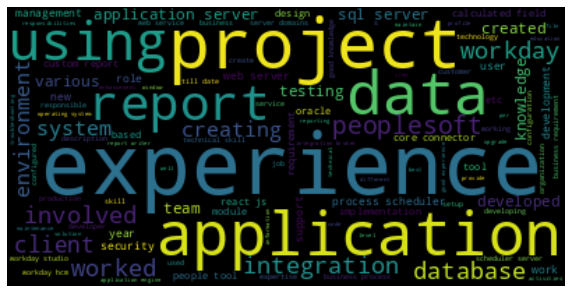

In [ ]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

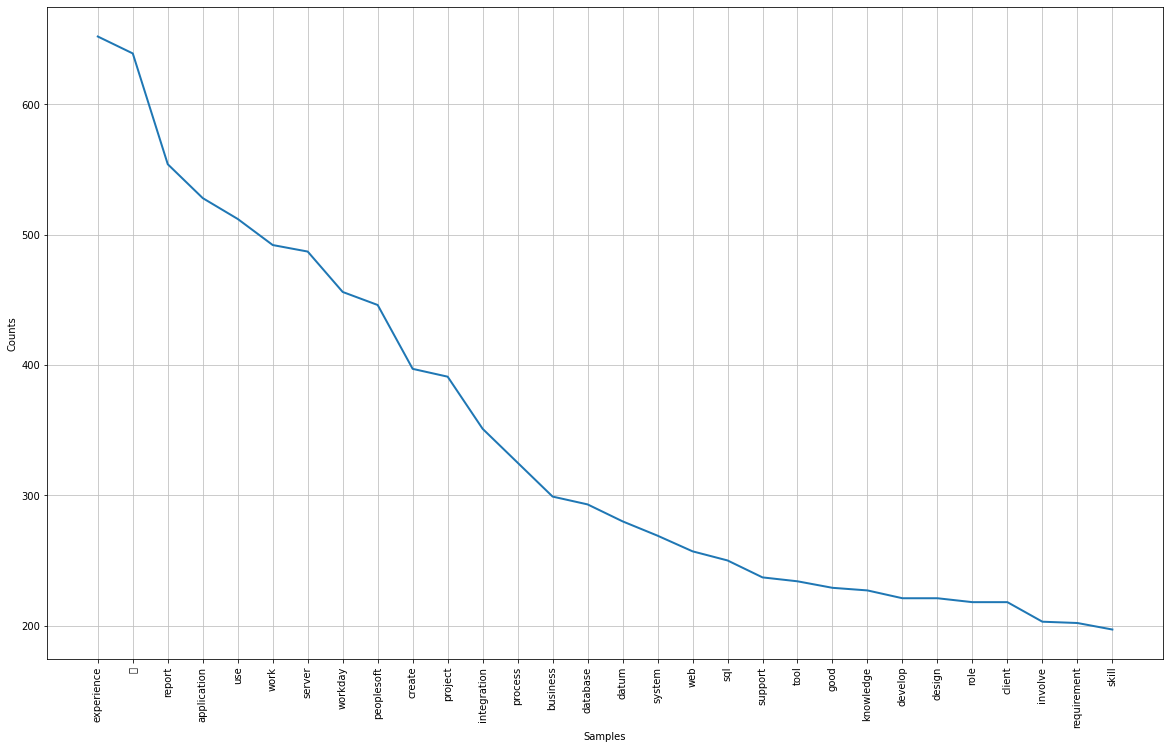

In [ ]:
##Word cloud Vs the Frequency plot
import matplotlib.pyplot as plt
# the frequency distribution of lema_words
freq_dist =nltk.FreqDist(lemmas)
#freq_dist = nltk.FreqDist(lem_words)
## frequency distribution plots
plt.subplots(figsize=(20,12))
freq_dist.plot(30);

Calculating each Characterstic in dataframe

In [ ]:
characters=data["Cleaned_Resumes"].apply(len)
characters

0     3531
1     1314
2     3526
3     2386
4     2271
      ... 
76    8628
77    5407
78    6044
79    7682
80    4736
Name: Cleaned_Resumes, Length: 81, dtype: int64

In [ ]:
print('Total Number of characters dataset:',characters.sum())
print('Mean of each characters in datset:',characters.mean())
print('Median of characters in dataset:',characters.median())
print('Standard Deviation of characters in dataset:',characters.std())
print('skew of characters dataset:',characters.skew())

Total Number of characters dataset: 377363
Mean of each characters in datset: 4658.802469135802
Median of characters in dataset: 4051.0
Standard Deviation of characters in dataset: 2846.2282780012265
skew of characters dataset: 1.8081888767678151


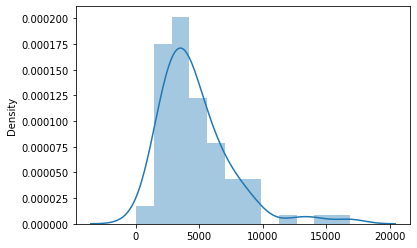

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(x = characters);

Calculating each Word Characterstic in dataframe

In [ ]:
words = data['Cleaned_Resumes'].apply(lambda x: len(str(x).split(' ')))
words

0      770
1      181
2      515
3      362
4      310
      ... 
76    1272
77     741
78     867
79    1112
80     660
Name: Cleaned_Resumes, Length: 81, dtype: int64

In [ ]:
print('Total Number of Word in dataset:',words.sum())
print('Mean of each Word in datset:',words.mean())
print('Median of Word in dataset:',words.median())
print('Standard Deviation of Word in dataset:',words.std())
print('skew of Word dataset:',words.skew())

Total Number of Word in dataset: 53884
Mean of each Word in datset: 665.2345679012345
Median of Word in dataset: 567.0
Standard Deviation of Word in dataset: 401.00066307940625
skew of Word dataset: 1.7339959249716412


<Axes: ylabel='Density'>

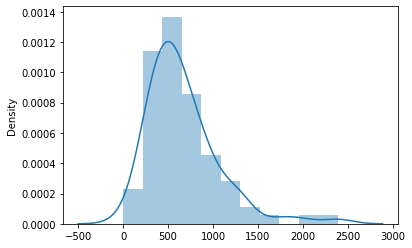

In [ ]:
sns.distplot(x = words)

VISUALIZATION OF DATASET

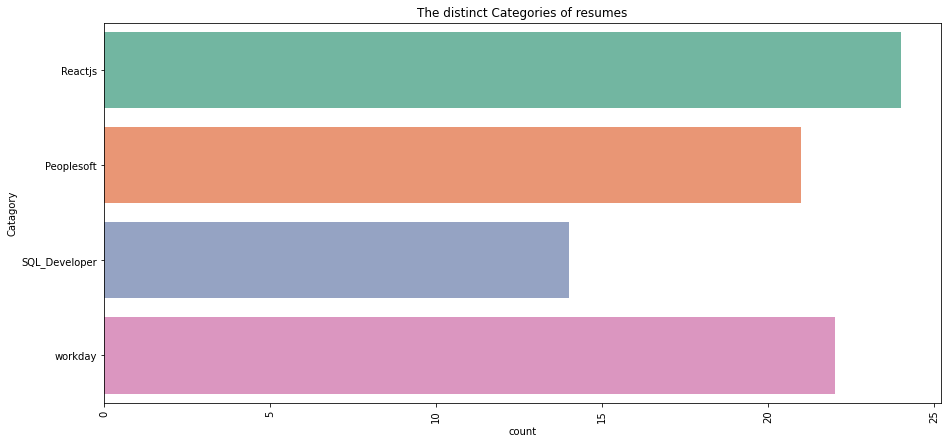

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(15,7))
plt.title("The distinct Categories of resumes")
plt.xticks(rotation=90)
sns.countplot(y="Catagory", data=data,palette=("Set2"))
plt.show()

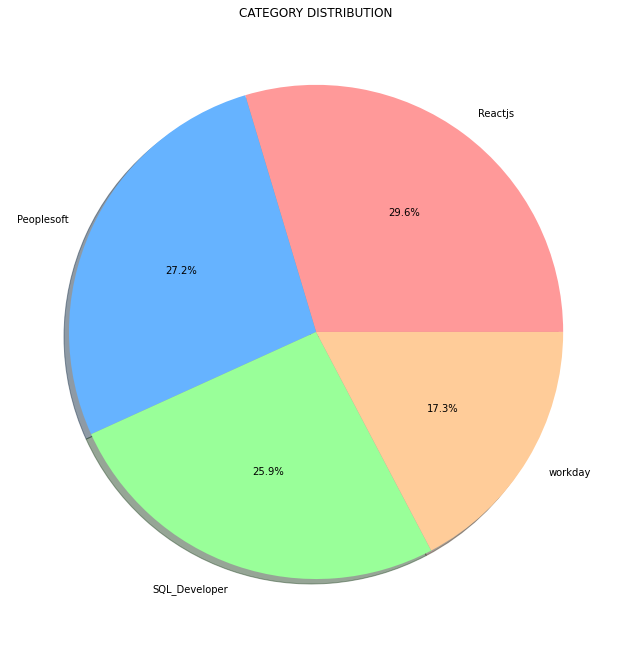

In [ ]:
from matplotlib.gridspec import GridSpec
targetCounts = data.Catagory.value_counts()
targetLabels  = data.Catagory.unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('plasma')
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')


source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [ ]:
def wordBarGraphFunction_1(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.style.use('fivethirtyeight')
    sns.barplot(x=np.arange(20),y= [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])])
    plt.xticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]),rotation=90)
    plt.title(title)
    plt.show()

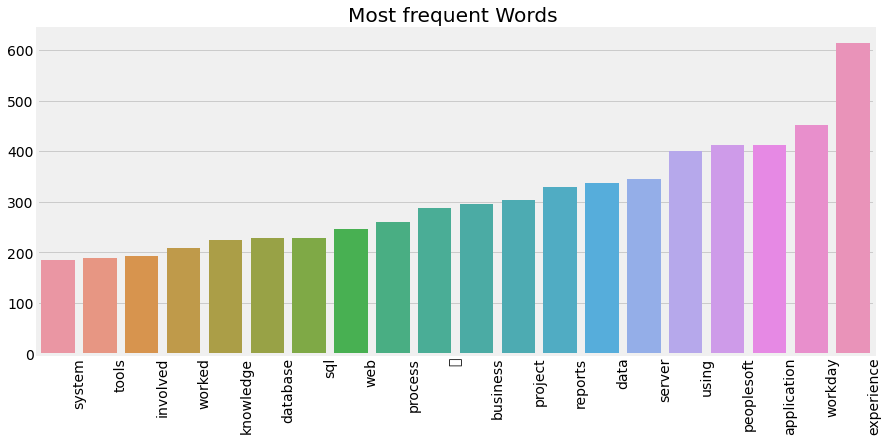

In [ ]:
plt.figure(figsize=(15,6))
wordBarGraphFunction_1(data,"Cleaned_Resumes","Most frequent Words ")

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

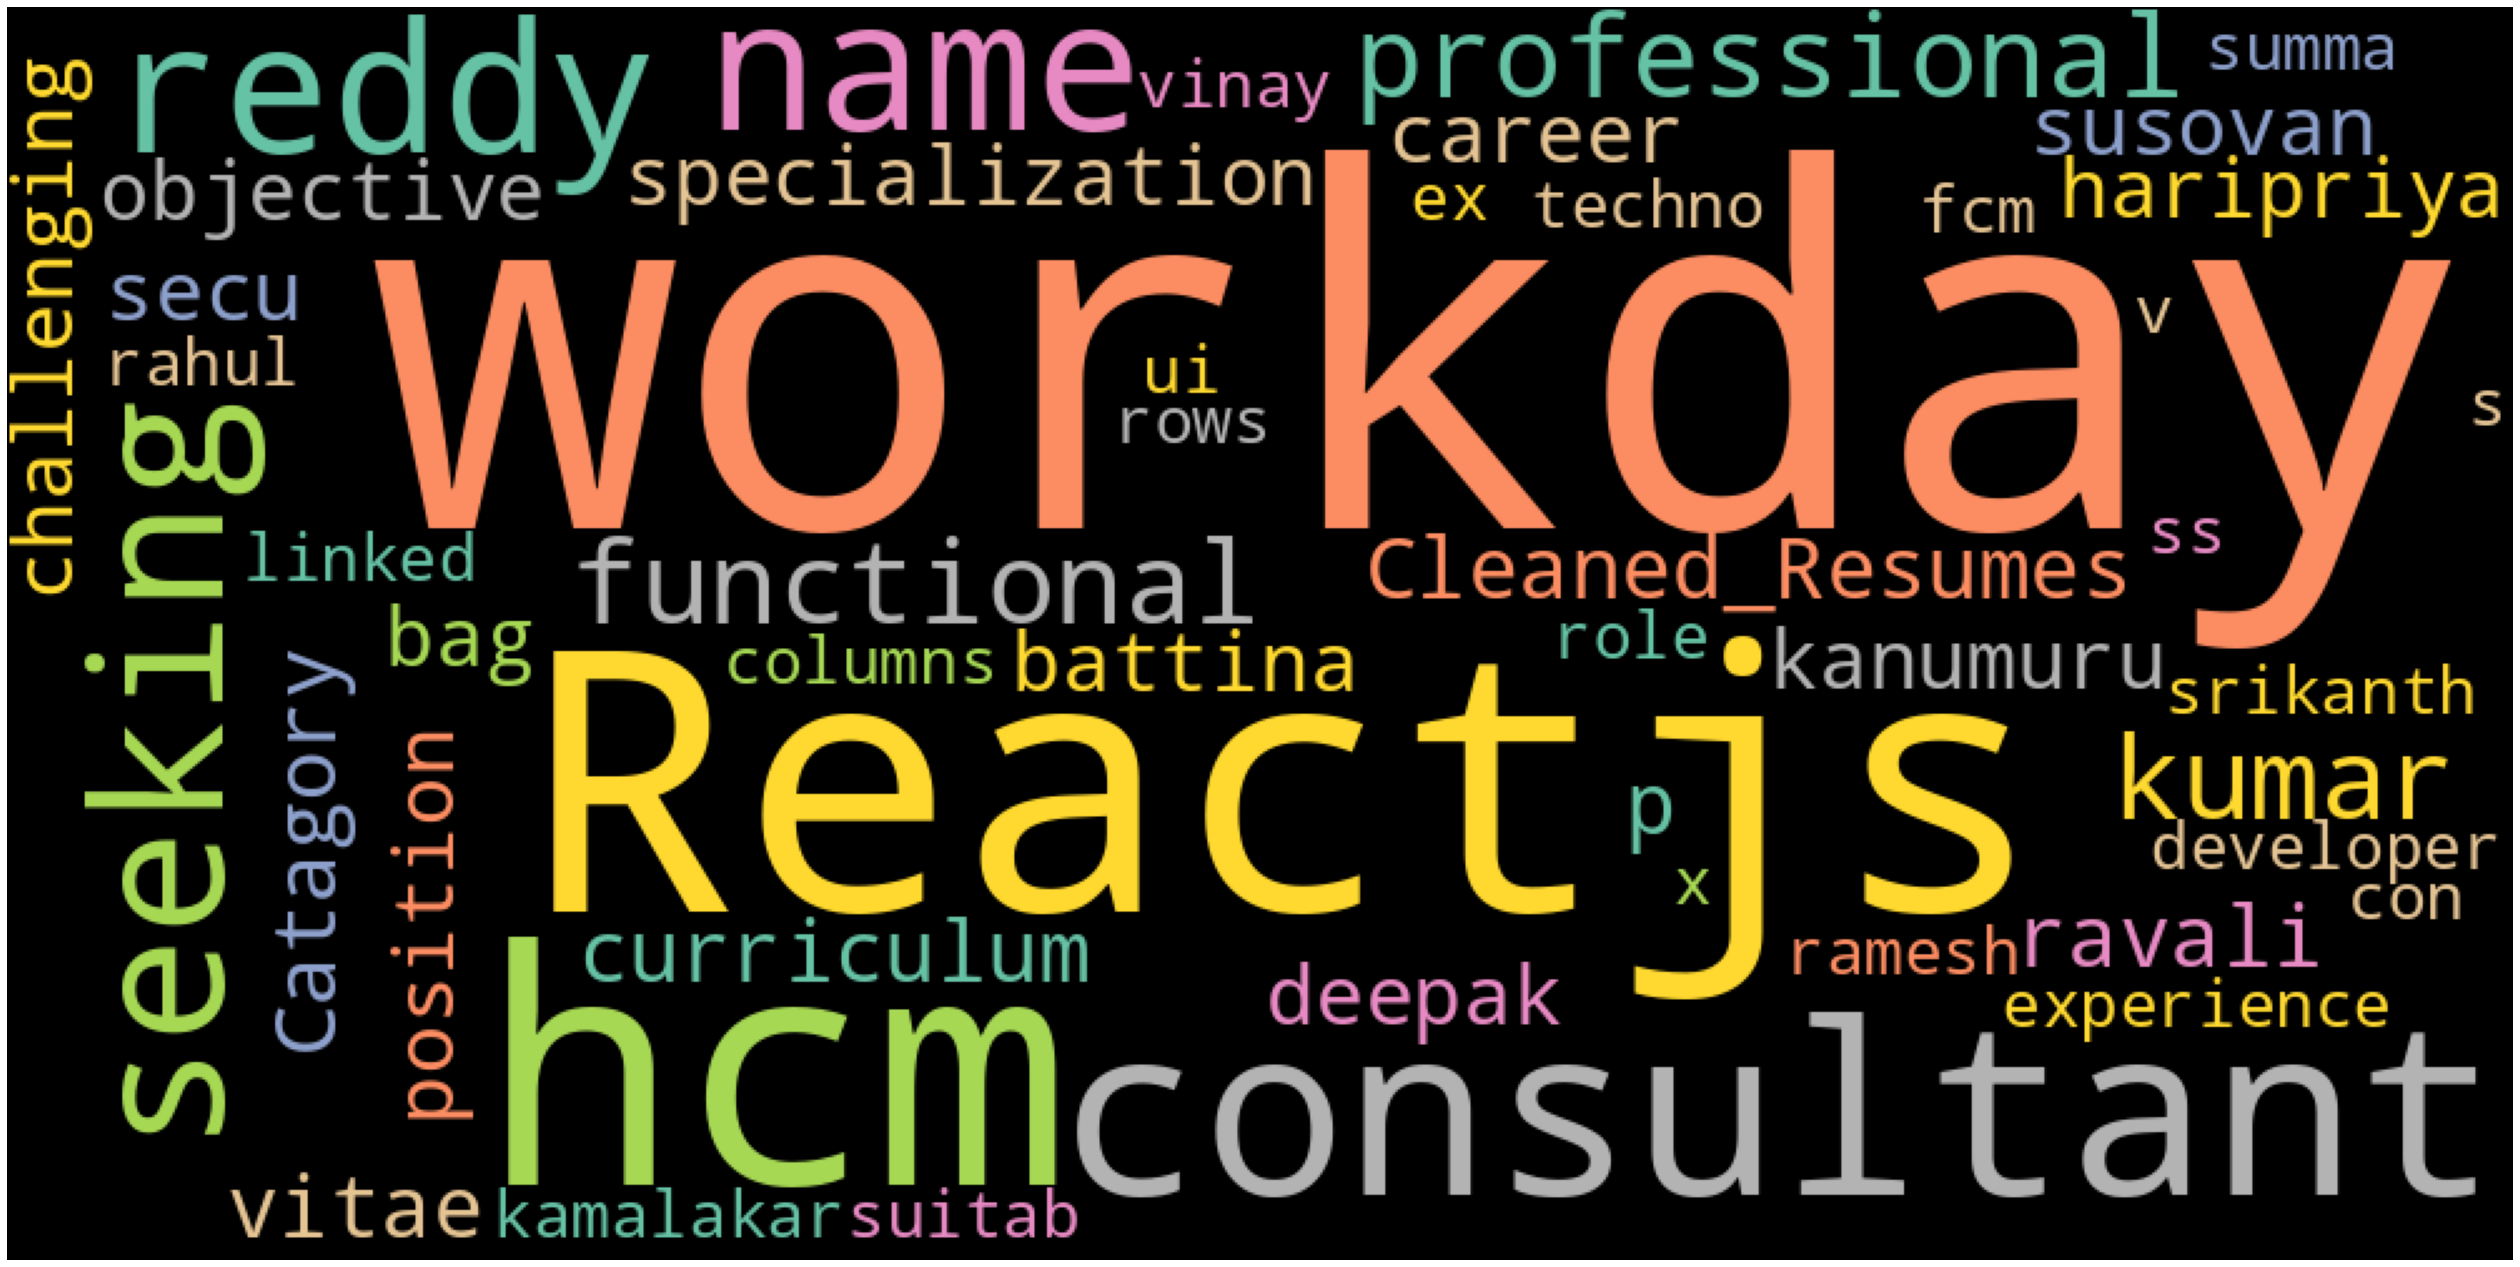

In [ ]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 1000, height = 500, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(str(data))
# Plot
plot_cloud(wordcloud)

In [ ]:
categories = np.sort(data['Catagory'].unique())

In [ ]:
categories

array(['Peoplesoft', 'Reactjs', 'SQL_Developer', 'workday'], dtype=object)

In [ ]:
data_categories = [data[data['Catagory'] == category].loc[:, ['Cleaned_Resumes', 'Catagory']] for category in categories]
data_categories

[                                      Cleaned_Resumes    Catagory
 24  anubhav kumar singh core competencies scriptin...  Peoplesoft
 25  classification internal classification interna...  Peoplesoft
 26  sirazuddin m bangalore india sirazuddin m bang...  Peoplesoft
 27  peoplesoft admin varkala vikas career objectiv...  Peoplesoft
 28  peoplesoft administration vivekanand sayana ca...  Peoplesoft
 29  hari narayana professional summary having year...  Peoplesoft
 30  murali professional summary having years of ex...  Peoplesoft
 31  priyabrata hota career objective pursuing peop...  Peoplesoft
 32  tanna sujatha objective seeking a challenging ...  Peoplesoft
 33  c o n t a c t address manyata tech park nagava...  Peoplesoft
 34  profile summary years of experience in impleme...  Peoplesoft
 35  peoplesoft database administrator gangareddy p...  Peoplesoft
 36  priyanka ramadoss mountpleasant coonoor the ni...  Peoplesoft
 37  peoplesoft administrator srinivask experience ...  People

In [ ]:
def wordcloud(df):
    txt = ' '.join(txt for txt in data['Cleaned_Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

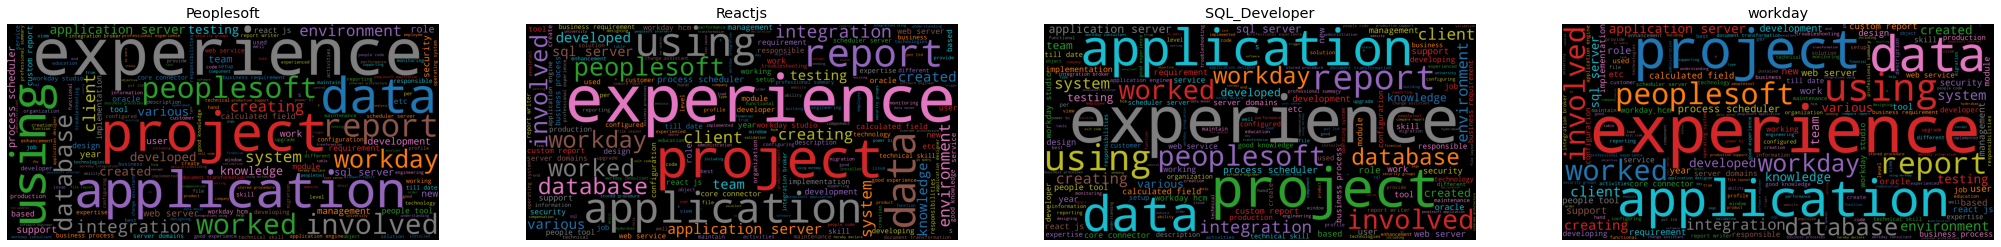

In [ ]:
PLOT_PALETTE = 'tableau-colorblind10'
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline
plt.figure(figsize=(40, 28))

for i, category in enumerate(categories):
    wc = wordcloud(data_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()
data["Encoded_Skill"] = le_encoder.fit_transform(data["Catagory"])
data.head()

,Catagory,Cleaned_Resumes,Encoded_Skill
0,Reactjs,name ravali p curriculum vitae specialization ...,1
1,Reactjs,susovan bag seeking a challenging position in ...,1
2,Reactjs,kanumuru deepak reddy career objective to secu...,1
3,Reactjs,haripriya battina experience as ui developer i...,1
4,Reactjs,kamalakar reddy a linked in professional summa...,1


Bag Of Words

In [ ]:
requiredText = data["Cleaned_Resumes"]
requiredTarget = data["Encoded_Skill"].values
Countvectorizer=CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',stop_words = 'english')
bag = Countvectorizer.fit_transform(requiredText)
Countvectorizer.vocabulary_

{'ravali': 3102,
 'p': 2683,
 'curriculum': 919,
 'vitae': 4153,
 'specialization': 3582,
 'computer': 729,
 'science': 3382,
 'engg': 1289,
 'c': 497,
 'r': 3075,
 'ee': 1227,
 'ob': 2568,
 'je': 2018,
 'ct': 904,
 'v': 4082,
 'e': 1203,
 'utilize': 4074,
 'technical': 3828,
 'skills': 3531,
 'achieving': 35,
 'target': 3804,
 'developing': 1088,
 'best': 386,
 'performance': 2770,
 'organization': 2651,
 'd': 940,
 'u': 4003,
 't': 3783,
 'ion': 1981,
 'degreecourse': 1011,
 'collegeinstitute': 673,
 'university': 4031,
 'board': 423,
 'percentage': 2767,
 'cgpa': 583,
 'year': 4292,
 'passing': 2721,
 'cgpacgpa': 584,
 's': 3326,
 'j': 2006,
 'b': 329,
 'institute': 1922,
 'technology': 3838,
 'vtu': 4177,
 'diploma': 1118,
 'aryabharathi': 253,
 'polytechnic': 2855,
 'karnataka': 2066,
 'state': 3658,
 'examination': 1354,
 'bengaluru': 385,
 'sslc': 3630,
 'empress': 1275,
 'girls': 1585,
 'high': 1718,
 'school': 3375,
 'secondary': 3405,
 'education': 1222,
 'manual': 2274,
 'te

VECTORIZATION

In [ ]:
vectorizer1 = CountVectorizer(min_df = 1, max_df = 0.9)
count_vect = vectorizer1.fit_transform(data["Cleaned_Resumes"])
word_freq_df = pd.DataFrame({'term': vectorizer1.get_feature_names_out(), 'occurrences':np.asarray(count_vect.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df

,term,occurrences,frequency
0,aa,1,0.000024
1,abdul,2,0.000048
2,abilities,2,0.000048
3,abilitiescommunication,1,0.000024
4,ability,43,0.001034
...,...,...,...
4452,zealand,1,0.000024
4453,zero,1,0.000024
4454,zerozilla,2,0.000048
4455,zones,1,0.000024


<Axes: ylabel='Density'>

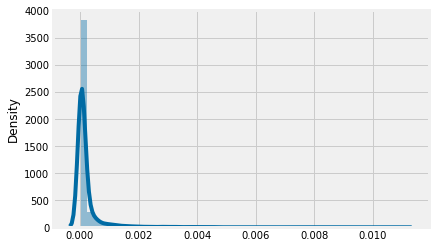

In [ ]:
sns.distplot(x =[word_freq_df['frequency']])

In [ ]:
data.to_csv("cleaned_data.csv")


In [ ]:
data.to_csv("cleaned_data.csv")

In [ ]:
data

,Catagory,Cleaned_Resumes,Encoded_Skill
0,Reactjs,name ravali p curriculum vitae specialization ...,1
1,Reactjs,susovan bag seeking a challenging position in ...,1
2,Reactjs,kanumuru deepak reddy career objective to secu...,1
3,Reactjs,haripriya battina experience as ui developer i...,1
4,Reactjs,kamalakar reddy a linked in professional summa...,1
...,...,...,...
76,workday,workday hcm techno functional consultant rahul...,3
77,workday,ramesh a workday hcm consultant professional s...,3
78,workday,srikanth workday hcm consultant seeking suitab...,3
79,workday,workday hcm fcm name kumar ss role workday con...,3


In [ ]:
data=data.iloc[:,0:2]
data

,Catagory,Cleaned_Resumes
0,Reactjs,name ravali p curriculum vitae specialization ...
1,Reactjs,susovan bag seeking a challenging position in ...
2,Reactjs,kanumuru deepak reddy career objective to secu...
3,Reactjs,haripriya battina experience as ui developer i...
4,Reactjs,kamalakar reddy a linked in professional summa...
...,...,...
76,workday,workday hcm techno functional consultant rahul...
77,workday,ramesh a workday hcm consultant professional s...
78,workday,srikanth workday hcm consultant seeking suitab...
79,workday,workday hcm fcm name kumar ss role workday con...


In [ ]:
data.head()

,Catagory,Cleaned_Resumes
0,Reactjs,name ravali p curriculum vitae specialization ...
1,Reactjs,susovan bag seeking a challenging position in ...
2,Reactjs,kanumuru deepak reddy career objective to secu...
3,Reactjs,haripriya battina experience as ui developer i...
4,Reactjs,kamalakar reddy a linked in professional summa...


In [ ]:
data['Catagory'].value_counts()

Reactjs          24
workday          22
Peoplesoft       21
SQL_Developer    14
Name: Catagory, dtype: int64

Split into independent and dependent varaiables :

In [ ]:
x = data['Cleaned_Resumes'].values 
y = data['Catagory'].values

Split into Train and Test set :

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [ ]:
Counter(y_train), Counter(y_test)

(Counter({'Peoplesoft': 17,
          'SQL_Developer': 11,
          'Reactjs': 19,
          'workday': 17}),
 Counter({'Reactjs': 5, 'SQL_Developer': 3, 'Peoplesoft': 4, 'workday': 5}))

In [ ]:
Test = pd.DataFrame(x_test).to_csv("Test.csv",index=False,encoding='utf-8-sig')

Feature Extraction :

Tf-Idf Vectorizer :

In [ ]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [ ]:
x_train_tf = tfidf_vector.fit_transform(x_train)
x_test_tf = tfidf_vector.transform(x_test)


In [ ]:
x_train_tf.shape, y_train.shape

((64, 3942), (64,))

In [ ]:
x_test_tf.shape, y_test.shape

((17, 3942), (17,))

Model building :

One vs Rest Classifier :

It fits one classifier per class. For each classifier, the class is fitted against all the other classes. It is a heuristic method for using binary classification algorithms for multi-class classification. It involves splitting the multi-class dataset into multiple binary classification problems.


Support Vector Machine Classifier :

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [ ]:
clf = OneVsRestClassifier(SVC(kernel='linear',probability=True,random_state=0))
clf.fit(x_train_tf, y_train)

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True,
                                  random_state=0))

Model Evaluation :

Train data :

Metrics :

In [ ]:
y_pred_train = clf.predict(x_train_tf)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_train,y_pred_train))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00        17
      Reactjs       1.00      1.00      1.00        19
SQL_Developer       1.00      1.00      1.00        11
      workday       1.00      1.00      1.00        17

     accuracy                           1.00        64
    macro avg       1.00      1.00      1.00        64
 weighted avg       1.00      1.00      1.00        64




Accuracy of Model with Cross-Validation for Training data :

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
accuracy1 = cross_val_score(clf,x_train_tf,y_train,scoring='accuracy',cv=10)
print(accuracy1)

[1.         1.         1.         0.85714286 1.         1.
 1.         1.         1.         1.        ]


In [ ]:
accuracy1c = np.round(accuracy1.mean()*100)
print('Accuracy of Model with Cross Validation is:',accuracy1c)

Accuracy of Model with Cross Validation is: 99.0


Test data :

In [ ]:
y_pred = clf.predict(x_test_tf)

Metrics :

In [ ]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         4
      Reactjs       1.00      1.00      1.00         5
SQL_Developer       1.00      1.00      1.00         3
      workday       1.00      1.00      1.00         5

     accuracy                           1.00        17
    macro avg       1.00      1.00      1.00        17
 weighted avg       1.00      1.00      1.00        17



In [ ]:
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score,classification_report
from sklearn.metrics import RocCurveDisplay,precision_recall_curve,roc_curve, auc

In [ ]:
accuracy_sv = round(accuracy_score(y_test,y_pred),4)
precision_sv = round(precision_score(y_test,y_pred,average = 'macro'),4)
recall_sv = round(recall_score(y_test,y_pred, average = 'macro'),4)
f1_sv = round(f1_score(y_test,y_pred, average = 'macro'),4)

In [ ]:
print('Accuracy Score  : ', accuracy_sv)
print('Precision Score : ', precision_sv)
print('Recall Score    : ', recall_sv)
print('f1-Score        : ', f1_sv)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


F1 Score becomes 1 only when precision and recall are both 1.

A Precision of 1 indicates the model produces no False Positives.

A recall of 1 indicates the model produces no False Negatives

Confusion Matrix :

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

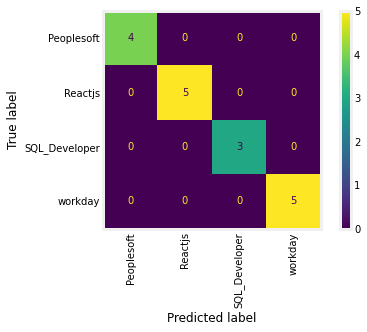

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,xticks_rotation='vertical')
plt.grid(False);

Predicting Probabilities :

In [ ]:
y_score = clf.predict_proba(x_test_tf)
y_score

array([[0.0111743 , 0.96924912, 0.00689133, 0.01268525],
       [0.14028588, 0.01854604, 0.82260051, 0.01856758],
       [0.97371995, 0.00544605, 0.00587926, 0.01495474],
       [0.95959212, 0.01187405, 0.00982354, 0.01871029],
       [0.01168817, 0.00498337, 0.00721793, 0.97611052],
       [0.12728051, 0.7820548 , 0.06827978, 0.02238491],
       [0.04245872, 0.00559431, 0.00914711, 0.94279986],
       [0.01317784, 0.96124322, 0.01303364, 0.0125453 ],
       [0.03014247, 0.91267223, 0.03659423, 0.02059107],
       [0.02454125, 0.00335877, 0.9572271 , 0.01487287],
       [0.03928463, 0.00387369, 0.94028645, 0.01655523],
       [0.93230322, 0.03744994, 0.01710124, 0.0131456 ],
       [0.01166731, 0.00698259, 0.00721085, 0.97413925],
       [0.04245872, 0.00559431, 0.00914711, 0.94279986],
       [0.00801088, 0.95803601, 0.011003  , 0.02295011],
       [0.97423992, 0.00535022, 0.00530175, 0.01510811],
       [0.01168042, 0.00697408, 0.00717821, 0.97416729]])

Label Binarize :

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer().fit(y_train)
y_onehot_test = lb.transform(y_test)
y_onehot_test.shape

(17, 4)

ROC-AUC Score :

In [ ]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
1.00


ROC-AUC Curve :

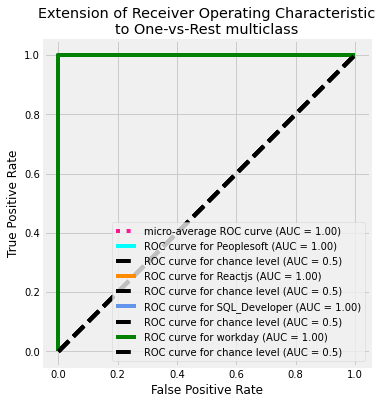

In [ ]:
from itertools import cycle
n_classes = len(np.unique(y))
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)


colors = cycle(["aqua", "darkorange", "cornflowerblue","green","maroon"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {np.unique(y)[class_id]}",
        color=color,
        ax=ax,
    )
    plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

AUC of 0.5 suggests no discrimination. Here AUC=1 indicates the predictions are 100 percent correct.

Naive-Bayes Classifier :

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
clf2 = OneVsRestClassifier(MultinomialNB())
clf2.fit(x_train_tf,y_train)

OneVsRestClassifier(estimator=MultinomialNB())

Model Evaluation :

Train data:

Metrics :

In [ ]:
y_pred_train2 = clf2.predict(x_train_tf)

In [ ]:
print(classification_report(y_train,y_pred_train2))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00        17
      Reactjs       1.00      1.00      1.00        19
SQL_Developer       1.00      1.00      1.00        11
      workday       1.00      1.00      1.00        17

     accuracy                           1.00        64
    macro avg       1.00      1.00      1.00        64
 weighted avg       1.00      1.00      1.00        64



Accuracy of Model with Cross-Validation for Training data:

In [ ]:
accuracy2 = cross_val_score(clf2,x_train_tf,y_train,scoring='accuracy',cv=10)
print(accuracy2)

[0.85714286 0.85714286 1.         0.85714286 1.         1.
 1.         0.83333333 1.         0.83333333]


In [ ]:
accuracy2c = np.round(accuracy2.mean()*100)
print('Accuracy of Model with Cross Validation is:',accuracy2c)

Accuracy of Model with Cross Validation is: 92.0


Test data :

Metrics :

In [ ]:
y_pred2 = clf2.predict(x_test_tf)

In [ ]:
print(classification_report(y_test,y_pred2))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         4
      Reactjs       1.00      1.00      1.00         5
SQL_Developer       1.00      0.67      0.80         3
      workday       0.83      1.00      0.91         5

     accuracy                           0.94        17
    macro avg       0.96      0.92      0.93        17
 weighted avg       0.95      0.94      0.94        17



In [ ]:
accuracy_n = round(accuracy_score(y_test,y_pred2),4)
precision_n = round(precision_score(y_test,y_pred2,average = 'macro'),4)
recall_n = round(recall_score(y_test,y_pred2, average = 'macro'),4)
f1_n = round(f1_score(y_test,y_pred2, average = 'macro'),4)

In [ ]:
print('Accuracy Score  : ', accuracy_n)
print('Precision Score : ', precision_n)
print('Recall Score    : ', recall_n)
print('f1-Score        : ', f1_n)

Accuracy Score  :  0.9412
Precision Score :  0.9583
Recall Score    :  0.9167
f1-Score        :  0.9273


Confusion Matrix :

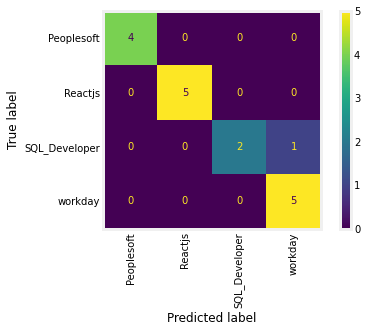

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred2,xticks_rotation='vertical')
plt.grid(False);

Predicting Probabilities :

In [ ]:
y_score2 = clf2.predict_proba(x_test_tf)
y_score2

array([[0.07414078, 0.80310319, 0.03831718, 0.08443886],
       [0.27270301, 0.1583664 , 0.27456257, 0.29436801],
       [0.90922466, 0.02007538, 0.01391979, 0.05678016],
       [0.83363015, 0.04218283, 0.02511799, 0.09906903],
       [0.0072362 , 0.00276301, 0.00158012, 0.98842067],
       [0.18864431, 0.47476082, 0.09415145, 0.24244342],
       [0.01958696, 0.00692109, 0.00455863, 0.96893333],
       [0.07326917, 0.79633906, 0.04590883, 0.08448294],
       [0.11468209, 0.62656211, 0.07090674, 0.18784906],
       [0.11707319, 0.05707019, 0.68156914, 0.14428748],
       [0.15584282, 0.07717338, 0.56924528, 0.19773852],
       [0.75068864, 0.09660564, 0.03921871, 0.11348701],
       [0.01992067, 0.00818933, 0.00510422, 0.96678577],
       [0.01958696, 0.00692109, 0.00455863, 0.96893333],
       [0.0524878 , 0.79915943, 0.03140389, 0.11694888],
       [0.91407807, 0.01869782, 0.01304966, 0.05417445],
       [0.02319598, 0.01553337, 0.01208857, 0.94918208]])


ROC-AUC Score :


In [ ]:
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score2.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
1.00


ROC-AUC Curve :

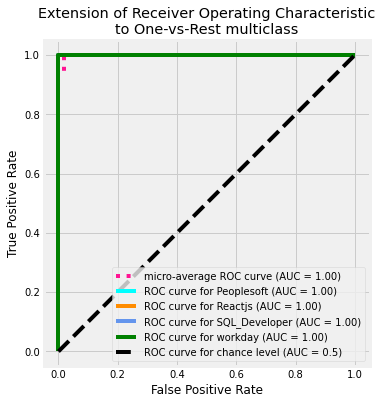

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)


colors = cycle(["aqua", "darkorange", "cornflowerblue","green","maroon"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score2[:, class_id],
        name=f"ROC curve for {np.unique(y)[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()


Comparison of SVM and Naive-Bayes :

In [ ]:
table = {'Classifier' : ['SVM Classifier', 'Naive-Bayes Classifier'], 
         'Accuracy' : [accuracy_sv, accuracy_n], 
         'Precision Score' : [precision_sv, precision_n], 
         'Recall Score' : [recall_sv, recall_n], 
         'F1_Score' : [f1_sv, f1_n]}
table = pd.DataFrame(table)
table.sort_values(["Accuracy"],ascending=False,inplace = True, ignore_index=True)
table

,Classifier,Accuracy,Precision Score,Recall Score,F1_Score
0,SVM Classifier,1.0000,1.0000,1.0000,1.0000
1,Naive-Bayes Classifier,0.9412,0.9583,0.9167,0.9273


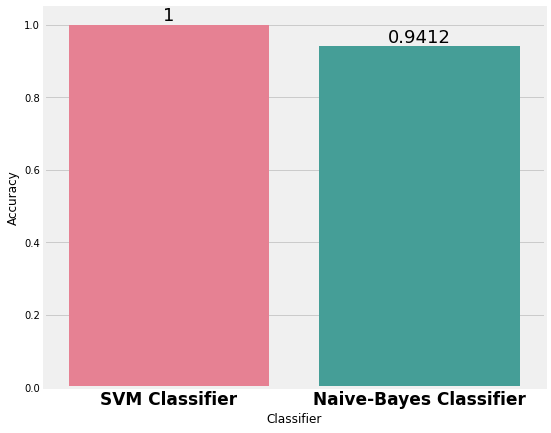

In [ ]:
plt.figure(figsize=(8,7))
ax = sns.barplot(data=table,y='Accuracy',x='Classifier',palette='husl',ci=None)
plt.xticks(fontsize=17,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)


Accuracy after Cross-Validation :

In [ ]:
table3 = {'Classifier' : ['SVM Classifier', 'Naive-Bayes Classifier'], 
         'Accuracy' : [accuracy1c, accuracy2c]}
table3 = pd.DataFrame(table3)
table3

,Classifier,Accuracy
0,SVM Classifier,99.0
1,Naive-Bayes Classifier,92.0


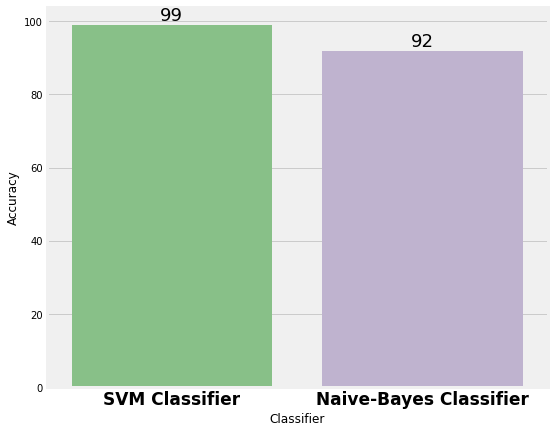

In [ ]:
table3.sort_values(["Accuracy"],ascending=False,inplace = True, ignore_index=True)
plt.figure(figsize=(8,7))
ax = sns.barplot(data=table3,y='Accuracy',x='Classifier',palette='Accent',ci=None)
plt.xticks(fontsize=17,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

NB gives good results when applied to short texts but SVM is more powerful to address non-linear classification tasks and generalizes well in high dimensional spaces like those corresponding to texts.


Other Classifiers :

Tree Classifiers :

Decision Tree Classifier :

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = OneVsRestClassifier(DecisionTreeClassifier(max_depth=3))
dt.fit(x_train_tf,y_train)
predict_d = dt.predict(x_test_tf)

In [ ]:
predict_dt = dt.predict(x_train_tf)

Metrics :

Train data :

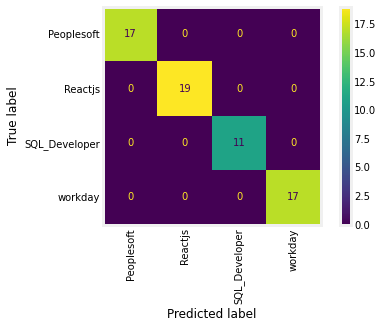

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train,predict_dt,xticks_rotation='vertical')
plt.grid(False);

In [ ]:
print(classification_report(y_train,predict_dt))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00        17
      Reactjs       1.00      1.00      1.00        19
SQL_Developer       1.00      1.00      1.00        11
      workday       1.00      1.00      1.00        17

     accuracy                           1.00        64
    macro avg       1.00      1.00      1.00        64
 weighted avg       1.00      1.00      1.00        64



Accuracy of Model with Cross-Validation for Training data

In [ ]:
accuracy3 = cross_val_score(dt,x_train_tf,y_train,scoring='accuracy',cv=10)
print(accuracy3)

[1.         0.71428571 0.71428571 0.85714286 0.83333333 0.83333333
 0.83333333 1.         1.         1.        ]


In [ ]:
accuracy3c = np.round(accuracy3.mean()*100)
print('Accuracy of Model with Cross Validation is:',accuracy3c)

Accuracy of Model with Cross Validation is: 88.0



Test data :

In [ ]:
cm_d = confusion_matrix(y_test,predict_d)
cm_d

array([[4, 0, 0, 0],
       [0, 3, 0, 2],
       [0, 0, 3, 0],
       [0, 0, 0, 5]])

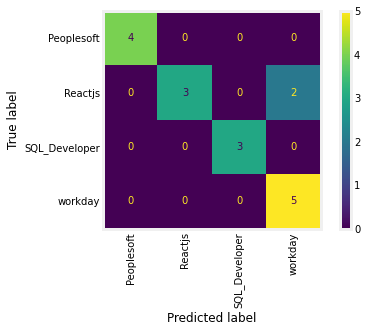

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,predict_d,xticks_rotation='vertical')
plt.grid(False);

In [ ]:
print(classification_report(y_test,predict_d))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         4
      Reactjs       1.00      0.60      0.75         5
SQL_Developer       1.00      1.00      1.00         3
      workday       0.71      1.00      0.83         5

     accuracy                           0.88        17
    macro avg       0.93      0.90      0.90        17
 weighted avg       0.92      0.88      0.88        17



In [ ]:
accuracy_d = round(accuracy_score(y_test,predict_d),4)
precision_d = round(precision_score(y_test,predict_d,average = 'macro'),4)
recall_d = round(recall_score(y_test,predict_d, average = 'macro'),4)
f1_d = round(f1_score(y_test,predict_d, average = 'macro'),4)

In [ ]:
print('Accuracy Score  : ', accuracy_d)
print('Precision Score : ', precision_d)
print('Recall Score    : ', recall_d)
print('f1-Score        : ', f1_d)

Accuracy Score  :  0.8824
Precision Score :  0.9286
Recall Score    :  0.9
f1-Score        :  0.8958


Random Forest Classifier :

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf = OneVsRestClassifier(RandomForestClassifier())
rf.fit(x_train_tf,y_train)
predict_r = rf.predict(x_test_tf)

In [ ]:
predict_rt = rf.predict(x_train_tf)

Metrics :

Train data :

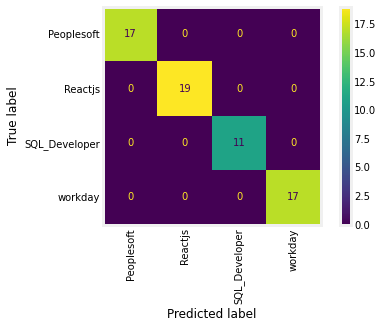

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train,predict_rt,xticks_rotation='vertical')
plt.grid(False);

In [ ]:
print(classification_report(y_train,predict_rt))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00        17
      Reactjs       1.00      1.00      1.00        19
SQL_Developer       1.00      1.00      1.00        11
      workday       1.00      1.00      1.00        17

     accuracy                           1.00        64
    macro avg       1.00      1.00      1.00        64
 weighted avg       1.00      1.00      1.00        64



Accuracy of Model with Cross-Validation for Training data:

In [ ]:
accuracy4 = cross_val_score(rf,x_train_tf,y_train,scoring='accuracy',cv=10)
print(accuracy4)

[0.85714286 1.         1.         0.71428571 1.         1.
 0.83333333 1.         1.         1.        ]


In [ ]:
accuracy4c = np.round(accuracy4.mean()*100)
print('Accuracy of Model with Cross Validation is:',accuracy4c)

Accuracy of Model with Cross Validation is: 94.0


Test data :

In [ ]:
cm_r = confusion_matrix(y_test,predict_r)
cm_r

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 5]])

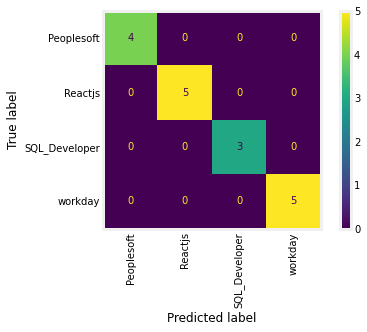

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,predict_r,xticks_rotation='vertical')
plt.grid(False);

In [ ]:
print(classification_report(y_test,predict_r))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         4
      Reactjs       1.00      1.00      1.00         5
SQL_Developer       1.00      1.00      1.00         3
      workday       1.00      1.00      1.00         5

     accuracy                           1.00        17
    macro avg       1.00      1.00      1.00        17
 weighted avg       1.00      1.00      1.00        17



In [ ]:
accuracy_r = round(accuracy_score(y_test,predict_r),4)
precision_r = round(precision_score(y_test,predict_r,average = 'macro'),4)
recall_r = round(recall_score(y_test,predict_r, average = 'macro'),4)
f1_r = round(f1_score(y_test,predict_r, average = 'macro'),4)

In [ ]:
print('Accuracy Score  : ', accuracy_r)
print('Precision Score : ', precision_r)
print('Recall Score    : ', recall_r)
print('f1-Score        : ', f1_r)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


Cross-Validation Accuracies of DecisionTree and RandomForest Classifiers:

In [ ]:
table4 = {'Classifier' : ['DecisionTree Classifier', 'RandomForest Classifier'], 
         'Accuracy' : [accuracy3c, accuracy4c]}
table4 = pd.DataFrame(table4)
table4

,Classifier,Accuracy
0,DecisionTree Classifier,88.0
1,RandomForest Classifier,94.0


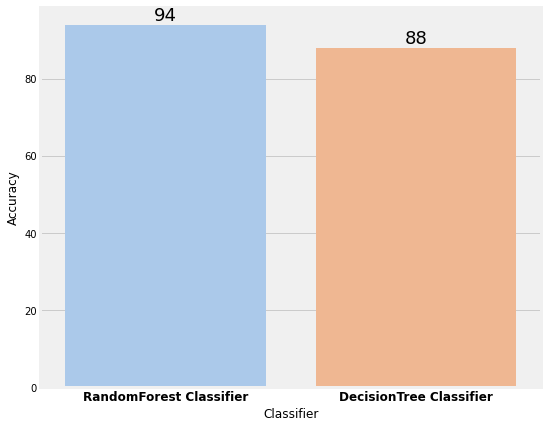

In [ ]:
table4.sort_values(["Accuracy"],ascending=False,inplace = True, ignore_index=True)
plt.figure(figsize=(8,7))
ax = sns.barplot(data=table4,y='Accuracy',x='Classifier',palette='pastel',ci=None)
plt.xticks(fontsize=12,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)


Though RandomForest and DecisionTree Classifiers give good accuracy, decision tree needs several key nodes which is hard to find 'several key tokens' at higher dimensions and random forest performs bad for high sparse dimensions

AdaBoost Classifier :

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [ ]:
ab = AdaBoostClassifier()
ab.fit(x_train_tf,y_train)
predict_a = ab.predict(x_test_tf)

In [ ]:
accuracy_a = accuracy_score(y_test,predict_a)
accuracy_a

0.7647058823529411

In [ ]:
cm_a = confusion_matrix(y_test,predict_a)
cm_a

array([[0, 4, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 5]])

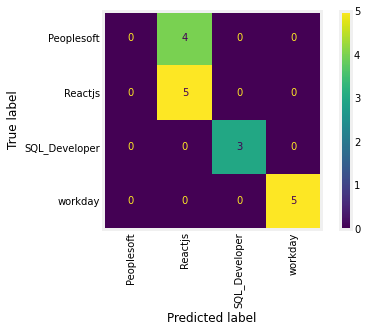

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,predict_a,xticks_rotation='vertical')
plt.grid(False);

In [ ]:
print(classification_report(y_test,predict_a))

               precision    recall  f1-score   support

   Peoplesoft       0.00      0.00      0.00         4
      Reactjs       0.56      1.00      0.71         5
SQL_Developer       1.00      1.00      1.00         3
      workday       1.00      1.00      1.00         5

     accuracy                           0.76        17
    macro avg       0.64      0.75      0.68        17
 weighted avg       0.63      0.76      0.68        17



In [ ]:
accuracy_a = round(accuracy_score(y_test,predict_a),4)
precision_a = round(precision_score(y_test,predict_a,average = 'macro'),4)
recall_a = round(recall_score(y_test,predict_a, average = 'macro'),4)
f1_a = round(f1_score(y_test,predict_a, average = 'macro'),4)

In [ ]:
print('Accuracy Score  : ', accuracy_a)
print('Precision Score : ', precision_a)
print('Recall Score    : ', recall_a)
print('f1-Score        : ', f1_a)

Accuracy Score  :  0.7647
Precision Score :  0.6389
Recall Score    :  0.75
f1-Score        :  0.6786


GradientBoosting Classifier :

In [ ]:
gd = GradientBoostingClassifier()
gd.fit(x_train_tf,y_train)
predict_g = gd.predict(x_test_tf)

In [ ]:
accuracy_g = accuracy_score(y_test,predict_g)
accuracy_g

1.0

In [ ]:
cm_g = confusion_matrix(y_test,predict_g)
cm_g

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 5]])

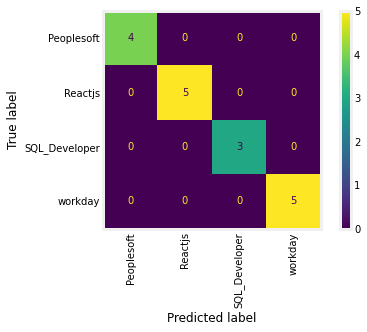

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,predict_g,xticks_rotation='vertical')
plt.grid(False);

In [ ]:
print(classification_report(y_test,predict_g))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         4
      Reactjs       1.00      1.00      1.00         5
SQL_Developer       1.00      1.00      1.00         3
      workday       1.00      1.00      1.00         5

     accuracy                           1.00        17
    macro avg       1.00      1.00      1.00        17
 weighted avg       1.00      1.00      1.00        17



In [ ]:
accuracy_g = round(accuracy_score(y_test,predict_g),4)
precision_g = round(precision_score(y_test,predict_g,average = 'macro'),4)
recall_g = round(recall_score(y_test,predict_g, average = 'macro'),4)
f1_g = round(f1_score(y_test,predict_g, average = 'macro'),4)

In [ ]:
print('Accuracy Score  : ', accuracy_g)
print('Precision Score : ', precision_g)
print('Recall Score    : ', recall_g)
print('f1-Score        : ', f1_g)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


XGBoost Classifier :

In [ ]:
le = LabelEncoder()

In [ ]:
data_xg = data.copy()
data_xg['Catagory']=le.fit_transform(data_xg['Catagory'])
data_xg.head()

,Catagory,Cleaned_Resumes
0,1,name ravali p curriculum vitae specialization ...
1,1,susovan bag seeking a challenging position in ...
2,1,kanumuru deepak reddy career objective to secu...
3,1,haripriya battina experience as ui developer i...
4,1,kamalakar reddy a linked in professional summa...


In [ ]:
data_xg['Catagory'].value_counts()

1    24
3    22
0    21
2    14
Name: Catagory, dtype: int64

In [ ]:
x_xg = data_xg['Cleaned_Resumes'].values 
y_xg = data_xg['Catagory'].values

In [ ]:
x_train_xg,x_test_xg,y_train_xg,y_test_xg = train_test_split(x_xg,y_xg,test_size=0.2,random_state=0,shuffle=True)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg = XGBClassifier()
xg.fit(x_train_tf,y_train_xg)
predict_x = xg.predict(x_test_tf)

In [ ]:
accuracy_x = accuracy_score(y_test_xg,predict_x)
accuracy_x

0.35294117647058826

In [ ]:
cm_x = confusion_matrix(y_test_xg,predict_x)
cm_x

array([[2, 1, 0, 2],
       [1, 2, 0, 0],
       [1, 2, 2, 0],
       [0, 2, 2, 0]])

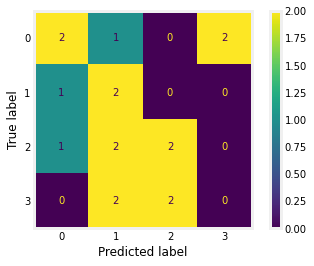

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_xg,predict_x)
plt.grid(False);

In [ ]:
print(classification_report(y_test_xg,predict_x))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.29      0.67      0.40         3
           2       0.50      0.40      0.44         5
           3       0.00      0.00      0.00         4

    accuracy                           0.35        17
   macro avg       0.32      0.37      0.32        17
weighted avg       0.34      0.35      0.33        17



In [ ]:
accuracy_x = round(accuracy_score(y_test_xg,predict_x),4)
precision_x = round(precision_score(y_test_xg,predict_x,average = 'macro'),4)
recall_x = round(recall_score(y_test_xg,predict_x, average = 'macro'),4)
f1_x = round(f1_score(y_test_xg,predict_x, average = 'macro'),4)

In [ ]:
print('Accuracy Score  : ', accuracy_x)
print('Precision Score : ', precision_x)
print('Recall Score    : ', recall_x)
print('f1-Score        : ', f1_x)

Accuracy Score  :  0.3529
Precision Score :  0.3214
Recall Score    :  0.3667
f1-Score        :  0.3222


LGBM-Boosting Classifier :

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm = LGBMClassifier()
lgbm.fit(x_train_tf,y_train)
predict_l = lgbm.predict(x_test_tf)

In [ ]:
accuracy_l = accuracy_score(y_test,predict_l)
accuracy_l

0.9411764705882353

In [ ]:
cm_l = confusion_matrix(y_test,predict_l)


In [ ]:
cm_l 

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 2, 0],
       [0, 0, 0, 5]])

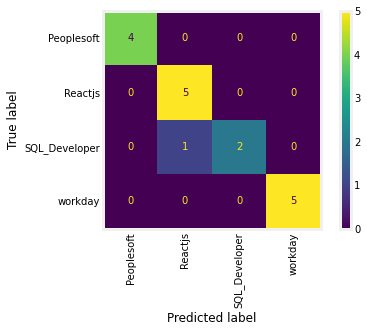

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,predict_l,xticks_rotation='vertical')
plt.grid(False);

In [ ]:
print(classification_report(y_test,predict_l))

               precision    recall  f1-score   support

   Peoplesoft       1.00      1.00      1.00         4
      Reactjs       0.83      1.00      0.91         5
SQL_Developer       1.00      0.67      0.80         3
      workday       1.00      1.00      1.00         5

     accuracy                           0.94        17
    macro avg       0.96      0.92      0.93        17
 weighted avg       0.95      0.94      0.94        17



In [ ]:
accuracy_l = round(accuracy_score(y_test,predict_l),4)
precision_l = round(precision_score(y_test,predict_l,average = 'macro'),4)
recall_l = round(recall_score(y_test,predict_l, average = 'macro'),4)
f1_l = round(f1_score(y_test,predict_l, average = 'macro'),4)

In [ ]:
print('Accuracy Score  : ', accuracy_l)
print('Precision Score : ', precision_l)
print('Recall Score    : ', recall_l)
print('f1-Score        : ', f1_l)

Accuracy Score  :  0.9412
Precision Score :  0.9583
Recall Score    :  0.9167
f1-Score        :  0.9273



Comparison of all Classifiers :

In [ ]:
table2 = {'Classifier' : ['SVM classifier','Naive-Bayes Classifier','Random Forest Classifier','Decision Tree Classifier',
                          'AdaBoost Classifier','Gradient Boosting Classifier','Xtreme Gradient Boosting Classifier', 
                         'Light Gradient Boosting Classifier'], 
         'Accuracy' : [accuracy_sv,accuracy_n,accuracy_r, accuracy_d, accuracy_a, accuracy_g, accuracy_x, accuracy_l], 
         'Precision Score' : [precision_sv,precision_n,precision_r,precision_d, precision_a, precision_g, 
                              precision_x, precision_l], 
         'Recall Score' : [recall_sv,recall_n,recall_r, recall_d,recall_a, recall_g, recall_x, recall_l], 
         'F1_Score' : [f1_sv,f1_n,f1_r,f1_d, f1_a, f1_g, f1_x, f1_l]}
table2 = pd.DataFrame(table2)
table2.sort_values(["Accuracy"],ascending=False,inplace = True, ignore_index=True)
table2

,Classifier,Accuracy,Precision Score,Recall Score,F1_Score
0,SVM classifier,1.0000,1.0000,1.0000,1.0000
1,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000
2,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000
3,Naive-Bayes Classifier,0.9412,0.9583,0.9167,0.9273
4,Light Gradient Boosting Classifier,0.9412,0.9583,0.9167,0.9273
5,Decision Tree Classifier,0.8824,0.9286,0.9000,0.8958
6,AdaBoost Classifier,0.7647,0.6389,0.7500,0.6786
7,Xtreme Gradient Boosting Classifier,0.3529,0.3214,0.3667,0.3222


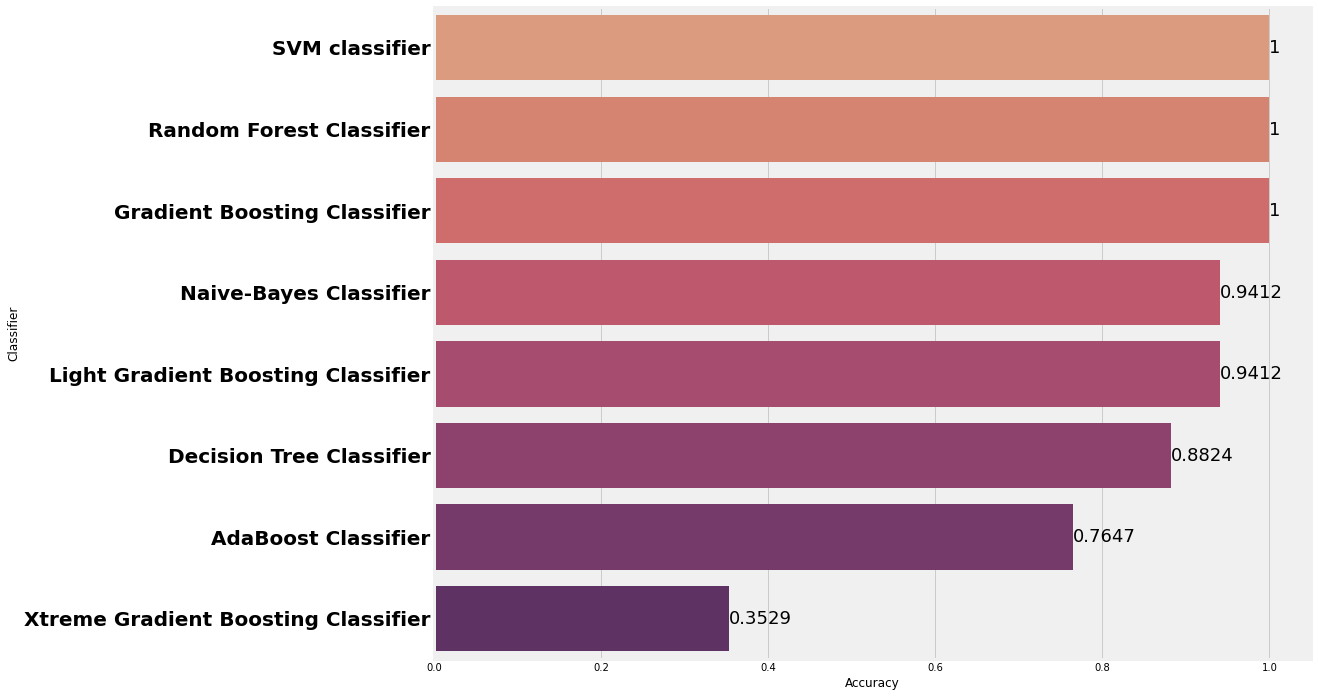

In [ ]:
plt.figure(figsize=(14,12))
ax = sns.barplot(data=table2,x='Accuracy',y='Classifier',palette='flare',ci=None)
plt.yticks(fontsize=20,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

Saving the best model :

SVMs generalize well in high dimensional feature spaces which eliminate the need for feature selection, making the ap- plication of text categorization considerably easier.

In [ ]:
import pickle

In [ ]:
filename = 'F:\model_svm.pkl'

In [ ]:
pickle.dump(clf,open(filename,'wb'))